<a href="https://colab.research.google.com/github/anneaiad/Challenge_Telecom_X_Alura_Pt2/blob/main/Challenge_Telecom_X_Alura_Pt2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛠️ Preparação dos Dados

# Extração do Arquivo Tratado

In [2]:
import pandas as pd

In [3]:
dados = pd.read_csv('/content/df_normalizado.csv')
dados

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,False,Female,False,True,True,9,True,No,DSL,...,Yes,No,Yes,Yes,No,One year,True,Mailed check,65.60,593.30
1,0003-MKNFE,False,Male,False,False,False,9,True,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,False,Mailed check,59.90,542.40
2,0004-TLHLJ,True,Male,False,False,False,4,True,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,True,Electronic check,73.90,280.85
3,0011-IGKFF,True,Male,True,True,False,13,True,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.00,1237.85
4,0013-EXCHZ,True,Female,True,True,False,3,True,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,False,Female,False,False,False,13,True,No,DSL,...,No,No,Yes,No,No,One year,False,Mailed check,55.15,742.90
7039,9992-RRAMN,True,Male,False,True,False,22,True,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,True,Electronic check,85.10,1873.70
7040,9992-UJOEL,False,Male,False,False,False,2,True,No,DSL,...,Yes,No,No,No,No,Month-to-month,True,Mailed check,50.30,92.75
7041,9993-LHIEB,False,Male,False,True,True,67,True,No,DSL,...,No,Yes,Yes,No,Yes,Two year,False,Mailed check,67.85,4627.65


# Remoção de Colunas Irrelevantes

In [4]:
df = dados.drop('customerID', axis=1)

In [5]:
df.head()

,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,internet_OnlineSecurity,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
0,False,Female,False,True,True,9,True,No,DSL,No,Yes,No,Yes,Yes,No,One year,True,Mailed check,65.6,593.30
1,False,Male,False,False,False,9,True,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,False,Mailed check,59.9,542.40
2,True,Male,False,False,False,4,True,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,True,Electronic check,73.9,280.85
3,True,Male,True,True,False,13,True,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,True,Electronic check,98.0,1237.85
4,True,Female,True,True,False,3,True,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,True,Mailed check,83.9,267.40


# Encoding

In [6]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7043 non-null   bool   
 1   customer_gender            7043 non-null   object 
 2   customer_SeniorCitizen     7043 non-null   bool   
 3   customer_Partner           7043 non-null   bool   
 4   customer_Dependents        7043 non-null   bool   
 5   customer_tenure            7043 non-null   int64  
 6   phone_PhoneService         7043 non-null   bool   
 7   phone_MultipleLines        7043 non-null   object 
 8   internet_InternetService   7043 non-null   object 
 9   internet_OnlineSecurity    7043 non-null   object 
 10  internet_OnlineBackup      7043 non-null   object 
 11  internet_DeviceProtection  7043 non-null   object 
 12  internet_TechSupport       7043 non-null   object 
 13  internet_StreamingTV       7043 non-null   objec

In [8]:
colunas = list(df.columns)
print(colunas)


['Churn', 'customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents', 'customer_tenure', 'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService', 'internet_OnlineSecurity', 'internet_OnlineBackup', 'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod', 'account_Charges.Monthly', 'account_Charges.Total']


In [9]:
for col in colunas:
    print(f"{col}: {df[col].unique()}")

Churn: [False  True]
customer_gender: ['Female' 'Male']
customer_SeniorCitizen: [False  True]
customer_Partner: [ True False]
customer_Dependents: [ True False]
customer_tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
phone_PhoneService: [ True False]
phone_MultipleLines: ['No' 'Yes' 'No phone service']
internet_InternetService: ['DSL' 'Fiber optic' 'No']
internet_OnlineSecurity: ['No' 'Yes' 'No internet service']
internet_OnlineBackup: ['Yes' 'No' 'No internet service']
internet_DeviceProtection: ['No' 'Yes' 'No internet service']
internet_TechSupport: ['Yes' 'No' 'No internet service']
internet_StreamingTV: ['Yes' 'No' 'No internet service']
internet_StreamingMovies: ['No' 'Yes' 'No internet service']
account_Contract: ['One year' 'Month-to-month' 'Two year']
account_PaperlessBilling: [ True False]
acco

In [10]:
df_numerico = df.select_dtypes(include=['int64', 'float64'])
df_categorico = df.select_dtypes(include=['object', 'bool'])


In [11]:
colunas_categoricas = df_categorico.columns
colunas_categoricas

Index(['Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'phone_PhoneService',
       'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod'],
      dtype='object')

In [12]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'phone_PhoneService',
       'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod']
),
    remainder = 'passthrough',
    sparse_threshold=0)

In [13]:
df_categorico = one_hot.fit_transform(df_categorico)

In [14]:
one_hot.get_feature_names_out(colunas_categoricas)

array(['onehotencoder__Churn_True', 'onehotencoder__customer_gender_Male',
       'onehotencoder__customer_SeniorCitizen_True',
       'onehotencoder__customer_Partner_True',
       'onehotencoder__customer_Dependents_True',
       'onehotencoder__phone_PhoneService_True',
       'onehotencoder__phone_MultipleLines_No',
       'onehotencoder__phone_MultipleLines_No phone service',
       'onehotencoder__phone_MultipleLines_Yes',
       'onehotencoder__internet_InternetService_DSL',
       'onehotencoder__internet_InternetService_Fiber optic',
       'onehotencoder__internet_InternetService_No',
       'onehotencoder__internet_OnlineSecurity_No',
       'onehotencoder__internet_OnlineSecurity_No internet service',
       'onehotencoder__internet_OnlineSecurity_Yes',
       'onehotencoder__internet_OnlineBackup_No',
       'onehotencoder__internet_OnlineBackup_No internet service',
       'onehotencoder__internet_OnlineBackup_Yes',
       'onehotencoder__internet_DeviceProtection_No',
  

In [15]:
df_encoded = pd.DataFrame(df_categorico, columns = one_hot.get_feature_names_out(colunas_categoricas))
df_encoded.head()

,onehotencoder__Churn_True,onehotencoder__customer_gender_Male,onehotencoder__customer_SeniorCitizen_True,onehotencoder__customer_Partner_True,onehotencoder__customer_Dependents_True,onehotencoder__phone_PhoneService_True,onehotencoder__phone_MultipleLines_No,onehotencoder__phone_MultipleLines_No phone service,onehotencoder__phone_MultipleLines_Yes,onehotencoder__internet_InternetService_DSL,...,onehotencoder__internet_StreamingMovies_No internet service,onehotencoder__internet_StreamingMovies_Yes,onehotencoder__account_Contract_Month-to-month,onehotencoder__account_Contract_One year,onehotencoder__account_Contract_Two year,onehotencoder__account_PaperlessBilling_True,onehotencoder__account_PaymentMethod_Bank transfer (automatic),onehotencoder__account_PaymentMethod_Credit card (automatic),onehotencoder__account_PaymentMethod_Electronic check,onehotencoder__account_PaymentMethod_Mailed check
0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [16]:
df_encoded.to_pickle('df_encoded.pkl')


In [34]:
y = df_encoded['onehotencoder__Churn_True']
X = df_encoded.drop('onehotencoder__Churn_True', axis=1)

# Verificação da Proporção de Evasão

In [18]:
print(y.value_counts(normalize=True))

onehotencoder__Churn_True
0.0    0.73463
1.0    0.26537
Name: proportion, dtype: float64


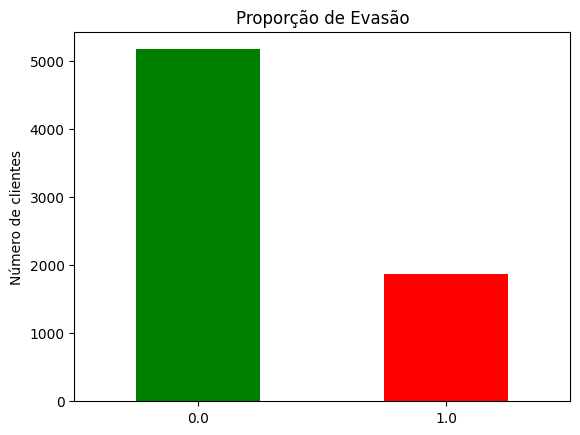

In [19]:
import matplotlib.pyplot as plt

y.value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Proporção de Evasão')
plt.ylabel('Número de clientes')
plt.xlabel('')
plt.xticks(rotation=0)
plt.show()


# 🎯 Correlação e Seleção de Variáveis

# Análise de Correlação

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
correlacoes = df_encoded.corr(numeric_only=True)['onehotencoder__Churn_True'].sort_values(ascending=False)
correlacoes


,onehotencoder__Churn_True
onehotencoder__Churn_True,1.000000
onehotencoder__account_Contract_Month-to-month,0.405103
onehotencoder__internet_OnlineSecurity_No,0.342637
onehotencoder__internet_TechSupport_No,0.337281
onehotencoder__internet_InternetService_Fiber optic,0.308020
onehotencoder__account_PaymentMethod_Electronic check,0.301919
onehotencoder__internet_OnlineBackup_No,0.268005
onehotencoder__internet_DeviceProtection_No,0.252481
onehotencoder__account_PaperlessBilling_True,0.191825
onehotencoder__customer_SeniorCitizen_True,0.150889


/tmp/ipython-input-2538382520.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlacoes.values, y=correlacoes.index, palette="coolwarm")


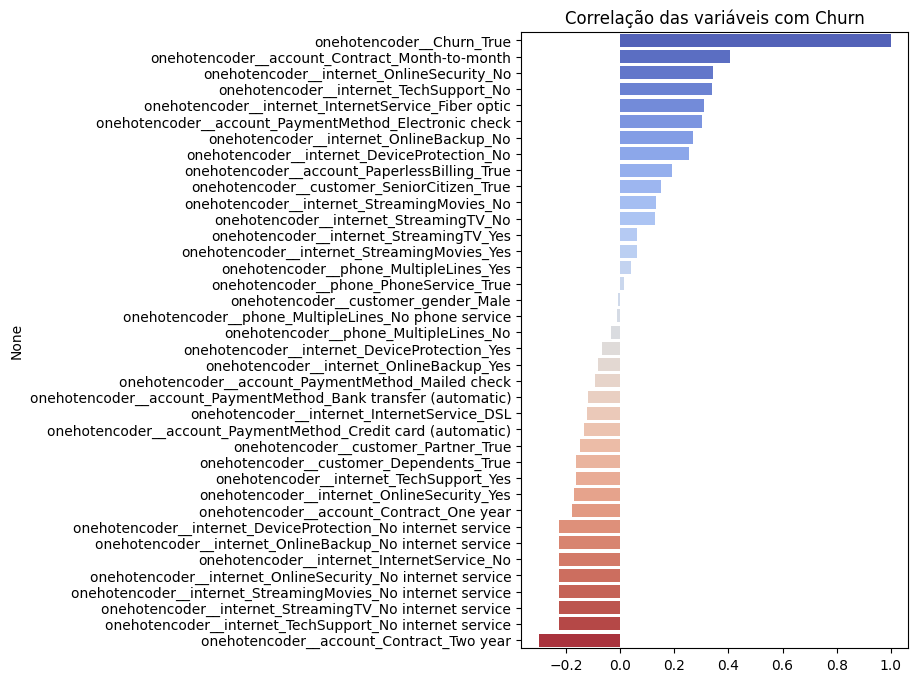

In [35]:
plt.figure(figsize=(5,8))
sns.barplot(x=correlacoes.values, y=correlacoes.index, palette="coolwarm")
plt.title("Correlação das variáveis com Churn")
plt.show();


# Análises Direcionadas

In [31]:
import plotly.express as px

In [58]:
df_plot = df.copy()

df_plot['Churn_lbl'] = df_plot['Churn'].map({False: 'Ficaram', True: 'Saíram'})

df_plot['Contrato_lbl'] = df_plot['account_Contract'].map({
    'One year': '1 Ano',
    'Month-to-month': 'Mensal',
    'Two year': '2 Anos'
})

fig = px.histogram(
    df_plot,
    x='Churn_lbl',
    color='Contrato_lbl',
    barmode='group',
    text_auto=True
)

fig.update_layout(
    title='Evasão por Tipo de Contrato',
    xaxis_title='',
    yaxis_title='Quantidade de clientes',
    legend_title='Tipo de contrato',
    width=800,
    height=500
)

fig.show()


In [50]:
df_mes_a_mes = df_encoded[df_encoded['onehotencoder__account_Contract_Month-to-month']==1]

proporcao = df_mes_a_mes['onehotencoder__Churn_True'].value_counts(normalize=True) * 100
proporcao = proporcao.rename({0:'Ficaram',1:'Saíram'})

df_prop = proporcao.reset_index()
df_prop.columns = ['Churn','Percentual']

fig = px.bar(
    df_prop,
    x='Churn',
    y='Percentual',
    text_auto='.1f',
    labels={'Churn':'Evasão','Percentual':'% de Clientes'},
    title='Proporção de Evasão de clientes com contrato Mês a Mês'

)
fig.update_layout(
    width=800,
    height=500
)

fig.show()


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7043 non-null   bool   
 1   customer_gender            7043 non-null   object 
 2   customer_SeniorCitizen     7043 non-null   bool   
 3   customer_Partner           7043 non-null   bool   
 4   customer_Dependents        7043 non-null   bool   
 5   customer_tenure            7043 non-null   int64  
 6   phone_PhoneService         7043 non-null   bool   
 7   phone_MultipleLines        7043 non-null   object 
 8   internet_InternetService   7043 non-null   object 
 9   internet_OnlineSecurity    7043 non-null   object 
 10  internet_OnlineBackup      7043 non-null   object 
 11  internet_DeviceProtection  7043 non-null   object 
 12  internet_TechSupport       7043 non-null   object 
 13  internet_StreamingTV       7043 non-null   objec

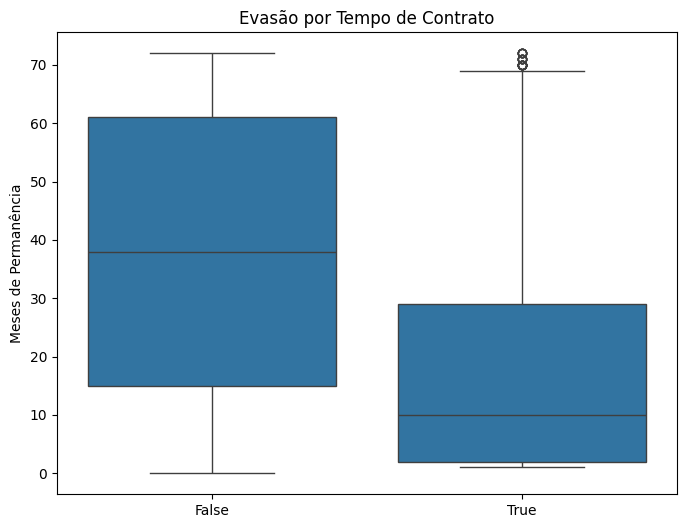

In [73]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='customer_tenure', data=df)
plt.title('Evasão por Tempo de Contrato')
plt.xlabel('')
plt.ylabel('Meses de Permanência')

plt.show()


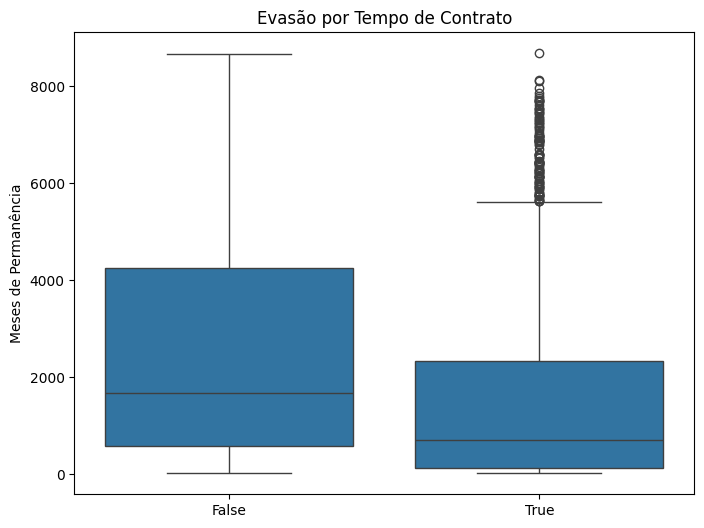

In [74]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn', y='account_Charges.Total', data=df)
plt.title('Evasão por Tempo de Contrato')
plt.xlabel('')
plt.ylabel('Meses de Permanência')
plt.show()

In [75]:
df_plot = df.copy()
df_plot['Churn_lbl'] = df_plot['Churn'].map({False:'Ficaram', True:'Saíram'})

service_map = {
    'internet_InternetService':'Tipo de Internet',
    'internet_OnlineSecurity':'Online Security',
    'internet_OnlineBackup':'Online Backup',
    'internet_DeviceProtection':'Device Protection',
    'internet_TechSupport':'Tech Support',
    'internet_StreamingTV':'Streaming TV',
    'internet_StreamingMovies':'Streaming Movies'
}

for col, label in service_map.items():
    if df_plot[col].dtype == 'object':
        df_plot[label] = df_plot[col]
    else:
        df_plot[label] = df_plot[col].map({0:'No',1:'Yes'})

    proporcao = pd.crosstab(df_plot[label], df_plot['Churn_lbl'], normalize='index') * 100
    proporcao = proporcao.reset_index().melt(id_vars=label, var_name='Churn', value_name='Percentual')

    fig = px.bar(
        proporcao,
        x=label,
        y='Percentual',
        color='Churn',
        text_auto='.1f',
        barmode='relative',
        labels={label:'Serviço', 'Percentual':'% de Clientes'},
        title=f'Proporção de Churn por {label}'
    )

    fig.update_layout(width=800, height=500)
    fig.show()


# 🤖 Modelagem Preditiva

# Separação de Dados

# Criação de Modelos

# Avaliação dos Modelos

# 📋  Interpretação e Conclusões

# Análise de Importância das Variáveis

# Conclusão